In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


# Goals, purpose, and why you should read this

 this project serves to observe the number of voter registrations in the provided states, and to extrapolate from it how the changes in the number of registrations differed both in relation to the two different years, and in relation to each other. Hence it is important to read this notebook because doing so will help to provide a greater understanding of registration patterns between the two years for any given state, which can be used to better understand the current situations in those states during those years.

Q1: nationally, which month had the highest voter registration turnout in 2016 and 2020? and how great was the difference between them?

Q2: which state had the greatest change in voter registration between the 2 years


## first thing after loading the dataset is to understand the category names and what they correspond to, for better use later ##

In [3]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


the variable JURISDICTION correspondes to the state in question, YEAR refers to the year in question, either 2016 or 2020, MONTH refers to which of the first 4 months of the year is in use, and NEW REGISTERED VOTERS refers to the number of people who registered to vote during that month

In [4]:
voters.isnull().values.any()
#good, no Null values

False

In [5]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [6]:
voters =voters.rename(columns={"New registered voters":"registered_voters"})
voters =voters.rename(columns={"Jurisdiction":"NAME"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


the data set only has the first 5 months of the year, and only has 12 states present within it, and it also does not show what party those people registered for, just showing the raw number of new registries at that time.

# finding the largest entry in the list



In [7]:
voters.sort_values(by="registered_voters",ascending = False).head(1)


,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


# determining the average number of new registries total

In [8]:
avgvoters=voters["registered_voters"].mean()
avgvoters


48223.46226415094

# every month in which the state exceeded that average, if at all

In [9]:
high_voters=voters
high_voters=high_voters.loc[high_voters.registered_voters>=avgvoters]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


# the same list, shortened to only the count the state passed

In [10]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


# the three highest mean registrations

In [11]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending = False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


# Visualizing the data

## Registries in total

In [12]:
state_voter=voters.groupby("NAME")["registered_voters"].sum().sort_values(ascending = False)
state_voter=pd.DataFrame(state_voter)

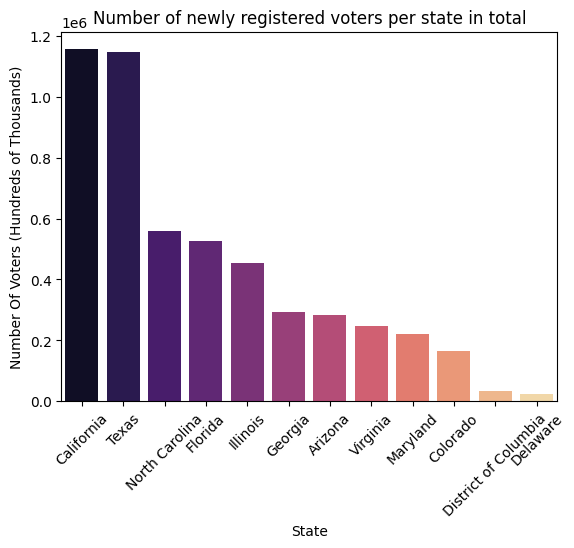

In [16]:
sns.barplot(state_voter,x="NAME",y="registered_voters",hue="NAME",palette="magma")
plt.title("Number of newly registered voters per state in total")
plt.figsize=(10, 10)
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Number Of Voters (Hundreds of Thousands)")
plt.show()

The larger states all tend to have much higher voter registration in total compared to the smaller states, with the exception of DC outpacing Delaware in voters

# Registries by month

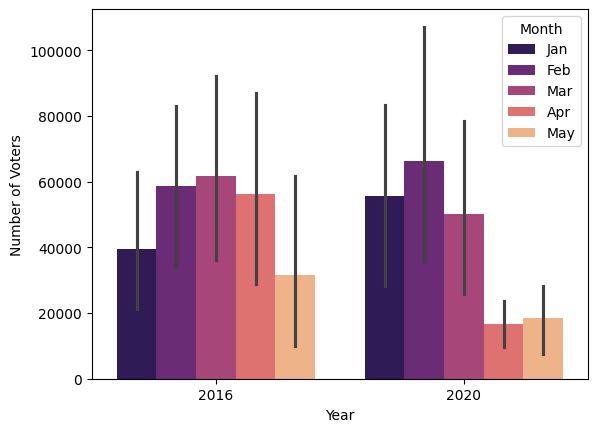

In [20]:

sns.barplot(voters,x="Year",y="registered_voters",palette="magma",hue="Month")
plt.xlabel("Year")
plt.ylabel("Number of Voters")
plt.show()

Voter registration was highest during the early months of both years, peaking in feb/mar in both cases

# greatest difference between 2016 and 2020 (absolute values)

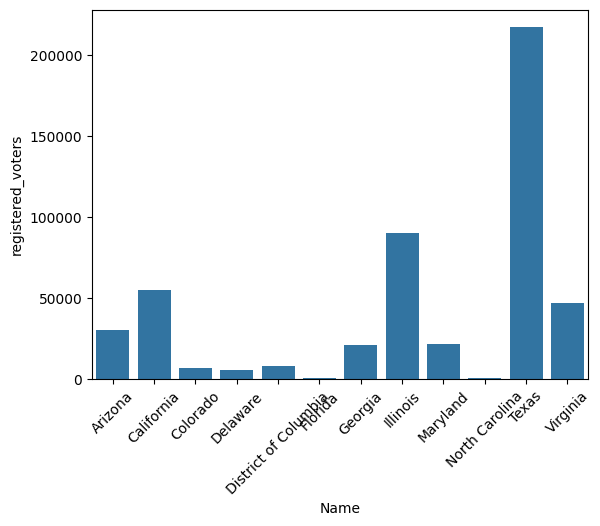

In [21]:
statevoteprev=voters.loc[voters.Year==2016]
statevotepres=voters.loc[voters.Year==2020]
totalprevvote=statevoteprev.groupby("NAME")["registered_voters"].sum()
totalpresvote=statevotepres.groupby("NAME")["registered_voters"].sum()
totalchange=abs(totalpresvote-totalprevvote)
totalchange=pd.DataFrame(totalchange)
sns.barplot(totalchange,x="NAME",y="registered_voters")
plt.xticks(rotation=45)
plt.xlabel("Name")
plt.show()

Texas has the largest absolute difference between its 2016 and 2020 number of voting registrations

# Mapping the Data

In [18]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.37 MiB/s, done.
Resolving deltas: 100% (13/13), done.


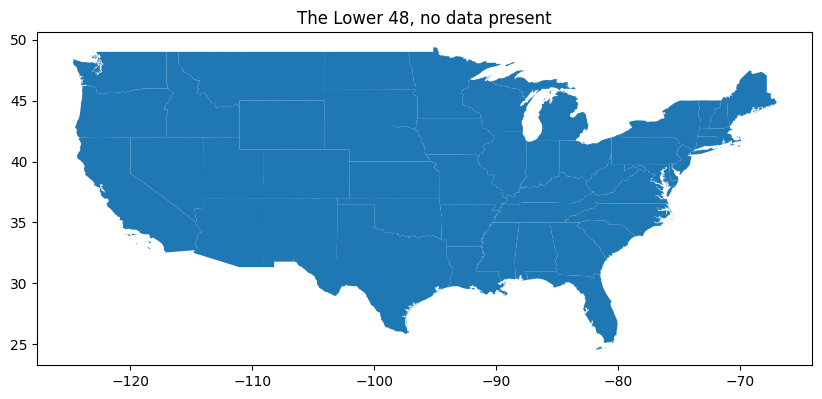

In [19]:
bbox = states.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))
plt.title("The Lower 48, no data present")
plt.show()

## average voter registration by state

In [ ]:
avgstatevoter=voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending = False)
avgstatevoter=pd.DataFrame(avgstatevoter)
avgstatevoter

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125
Illinois,56840.375
North Carolina,56040.800
Georgia,36604.125
Arizona,35311.500
Virginia,24845.200
Maryland,22133.500


In [ ]:
state_pops= bbox.merge(avgstatevoter, on="NAME", how="inner")

## Mapping the average across the lower 48 (in the given states)

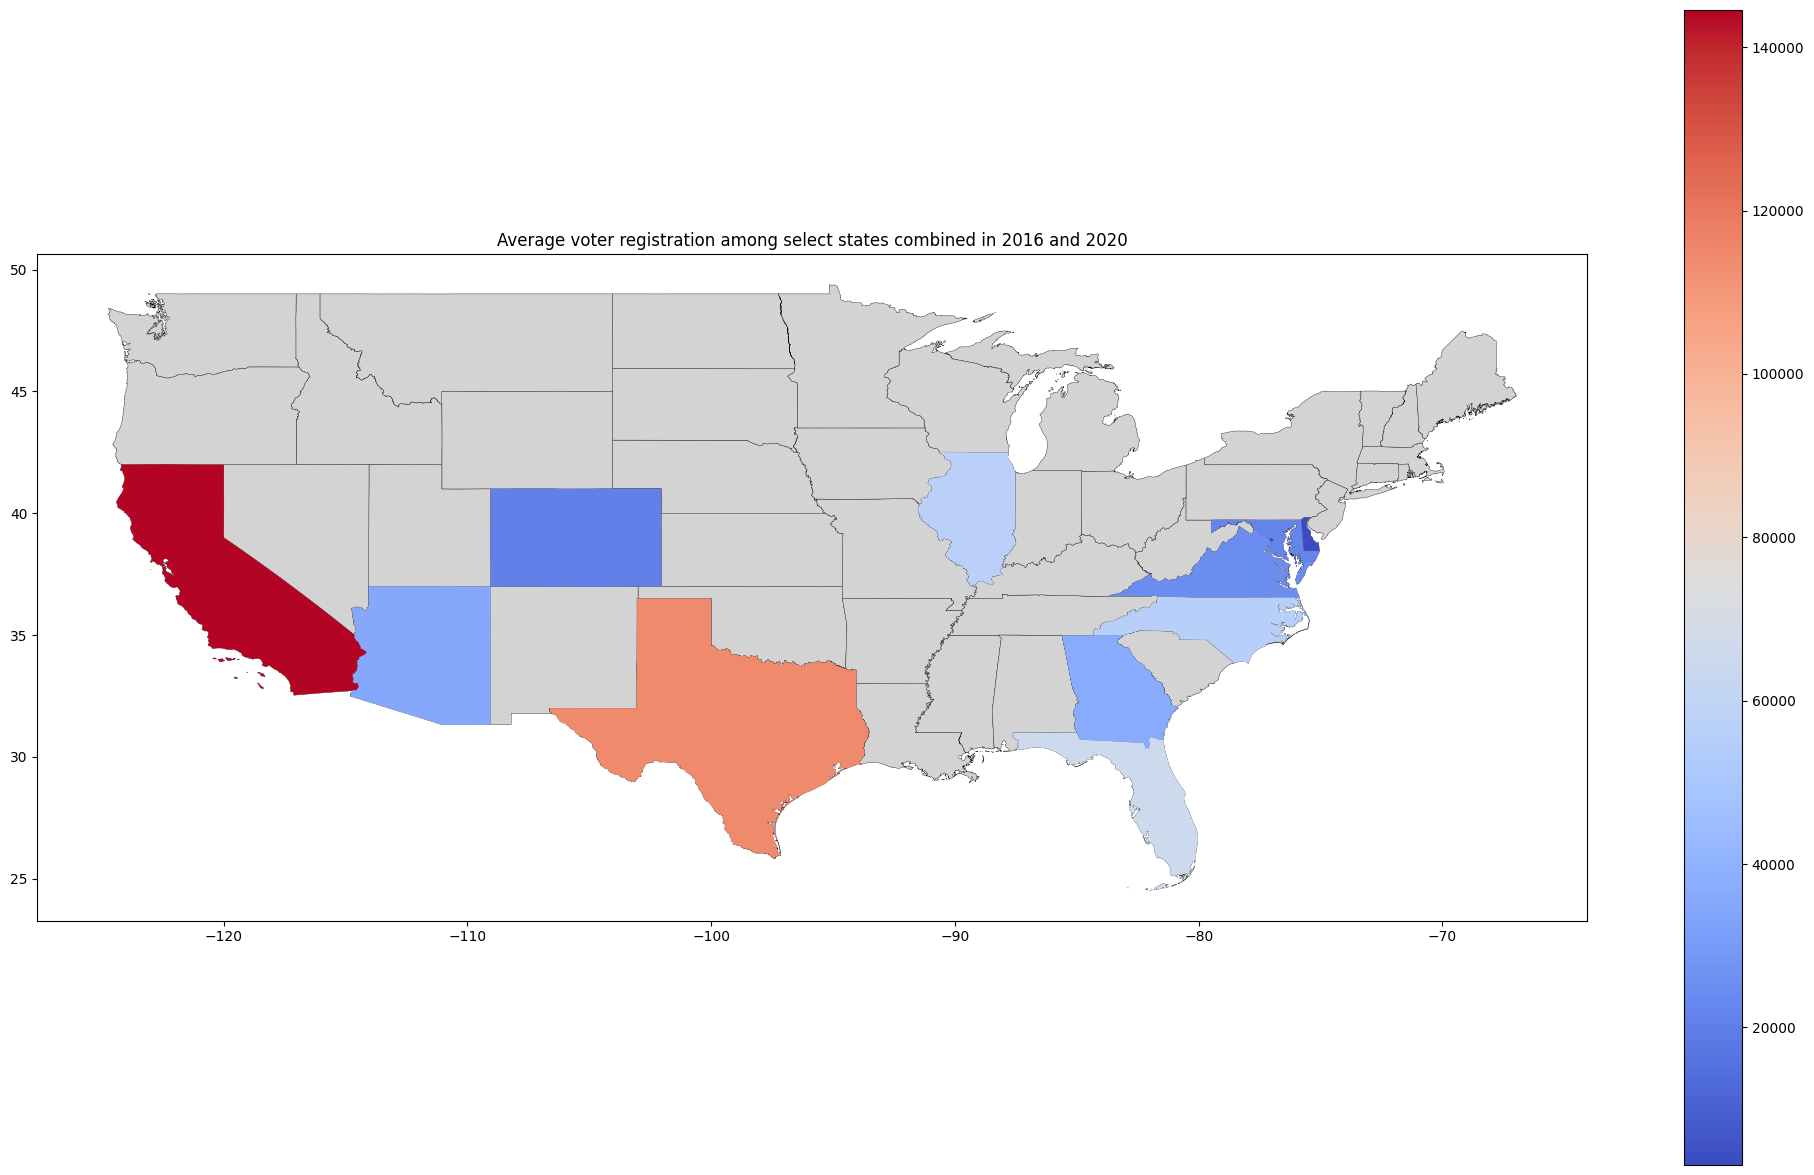

In [ ]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
bbox.plot(ax=ax,color="lightgray",edgecolor="black",linewidth=.25)
state_pops.plot(column="registered_voters",ax=ax,legend=True,cmap="coolwarm")
plt.title("Average new voter registration among select states combined in 2016 and 2020")
plt.show()

from this data, we can see that when it comes to newly registered voting patterns among the states, that among the states we have data on, the largest changes and numbers of voters are almost always in regards to California or to Texas. this makes sense considering they are the two largest states on the list, however a less expected outcome is in regards to Florida, which is relatively low in regards to most of the statistics present, despite it being the 3rd most populous state on this list, it is not always in the 3rd position. another observation is that many of the states dropped a significant amount in new registered voters during 2020.

observing these patterns in voter registrations in 2016 and 2020, some suggestions could that could be made are:

it could be a good idea to target the states not in the High Voters list, as there could be a large number of unreached potential voters within those states.

the best time to reach new voters seems to be in febuary/march, as a result it may be beneficial to urge registrations during those months, or to more closely monitor those registrations.

if I were to continue working on this project, some additional steps I would take would be to determine what party those new voters registered for in each state/year. In addition to that, I would like to expand the amount of data to include either additional states or additional months so that the data is clearer. If no new data can be acquired, an extra step I would take then would be to compare the states using the Median value, rather than the Mean or Sum values, as I feel they might better encapsulate the data I am looking for without the anomaly in april/may 2020.

https://github.com/Brode203/325-Midterm/blob/main/Broderick_Weiss_Midterm_Project_325_Spring.ipynb

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
#Broderick Weiss